Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

##Загрузите файл HR.csv в pandas dataframe

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [13]:
!pip install gdown
import gdown

In [14]:
file_url = 'https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1'
output_path = '/content/HR.csv'

In [15]:
gdown.download(file_url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1
To: /content/HR.csv
100%|██████████| 567k/567k [00:00<00:00, 24.2MB/s]


'/content/HR.csv'

In [16]:
df = pd.read_csv('HR.csv', delimiter=',')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение

In [17]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


##Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
df_new = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']].copy()
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [25]:
df_new.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

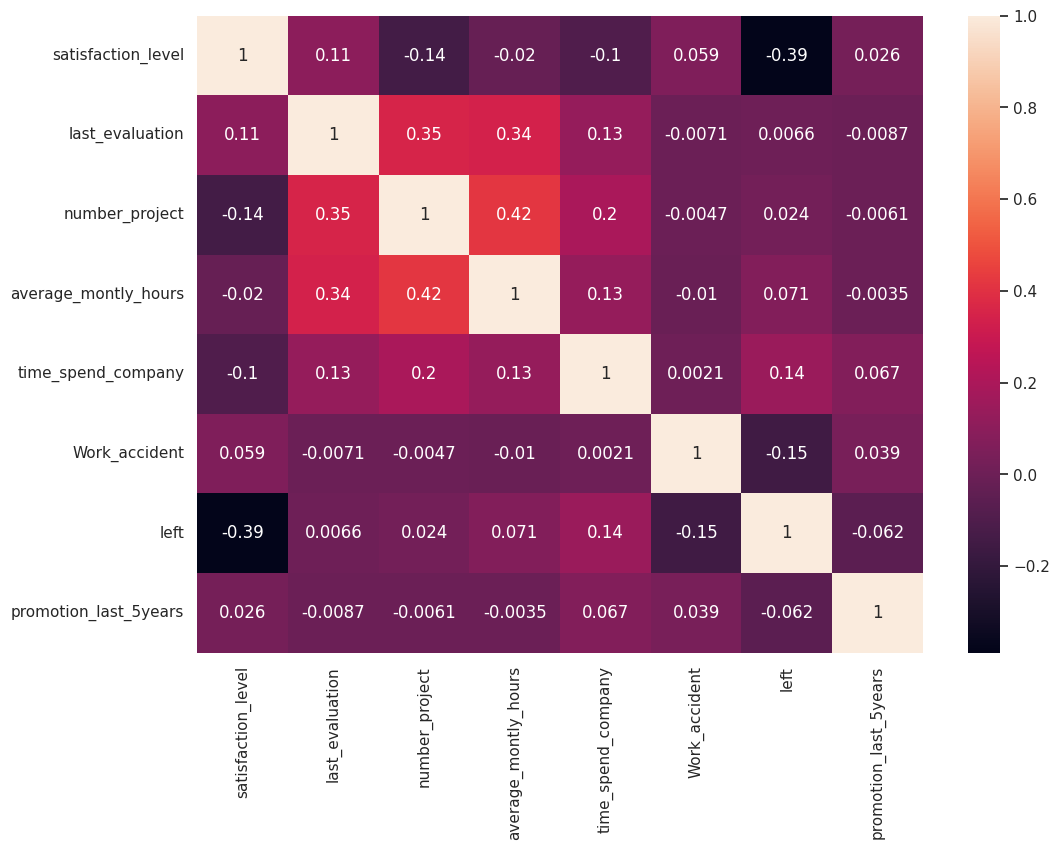

In [26]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_new.corr(), annot=True)

In [28]:
correlation_matrix=df_new.corr()
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
most_correlated

satisfaction_level     satisfaction_level       1.000000
number_project         average_montly_hours     0.417211
last_evaluation        number_project           0.349333
average_montly_hours   last_evaluation          0.339742
time_spend_company     number_project           0.196786
left                   time_spend_company       0.144822
last_evaluation        time_spend_company       0.131591
time_spend_company     average_montly_hours     0.127755
last_evaluation        satisfaction_level       0.105021
left                   average_montly_hours     0.071287
promotion_last_5years  time_spend_company       0.067433
Work_accident          satisfaction_level       0.058697
promotion_last_5years  Work_accident            0.039245
                       satisfaction_level       0.025605
left                   number_project           0.023787
last_evaluation        left                     0.006567
time_spend_company     Work_accident            0.002120
average_montly_hours   promotio

две самые скоррелированные
number_project   и      average_montly_hours  0.417211,

left         и          satisfaction_level  -0.388375

две наименее скоррелированные

time_spend_company   и  Work_accident            0.002120
average_montly_hours и  promotion_last_5years   -0.003544 , поскольку они наиболее близки по значению к 0


##Рассчитайте сколько сотрудников работает в каждом департаменте.

In [29]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

##Показать распределение сотрудников по зарплатам

<Axes: ylabel='salary'>

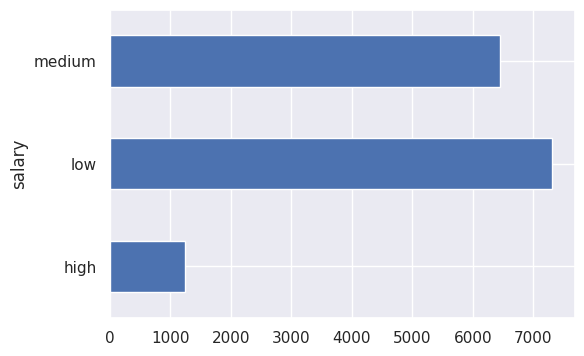

In [34]:
df.groupby('salary')['salary'].count().plot(kind="barh", figsize=(6, 4))

##Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [52]:
pivot_table = df.pivot_table(index='department', columns='salary', values='average_montly_hours', aggfunc='count')
pivot_table

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


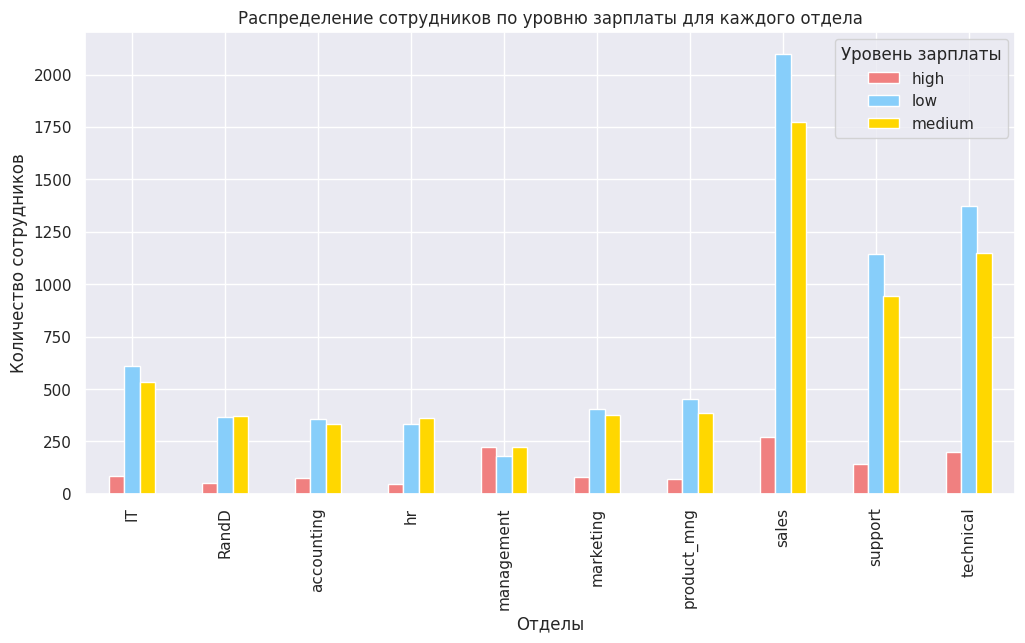

In [53]:
colors = ['lightcoral', 'lightskyblue', 'gold']
pivot_table.plot(kind='bar', color=colors, figsize=(12, 6))
plt.xlabel('Отделы')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по уровню зарплаты для каждого отдела')
plt.legend(title='Уровень зарплаты')

plt.show()

##Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Нулевая гипотеза (H0): Сотрудники с высоким окладом проводят больше времени на работе, чем сотрудники с низким окладом.
Альтернативная гипотеза (H1): Сотрудники с высоким окладом не проводят больше времени на работе, чем сотрудники с низким окладом.

In [54]:
from scipy import stats
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']


In [56]:
t_stat, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)
print(t_stat, p_value)

-0.7288680398062308 0.4661023478267259


In [59]:
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Сотрудники с высоким окладом не проводят больше времени на работе, чем сотрудники с низким окладом")
else:
    print("Не отвергаем нулевую гипотезу. Сотрудники с высоким окладом, возможно, проводят больше времени на работе, чем сотрудники с низким окладом.")

Не отвергаем нулевую гипотезу. Сотрудники с высоким окладом, возможно, проводят больше времени на работе, чем сотрудники с низким окладом.


##Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [74]:
df_left = df.loc[df['left'] == 1]
df_left.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [83]:
df_not_left = df.loc[df['left'] == 0]
df_not_left.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low


In [84]:
promotion_rate_among_leavers = df_left['promotion_last_5years'].mean()

print("Доля сотрудников с повышением за последние 5 лет среди ушедших сотрудников: {:.2%}".format(promotion_rate_among_leavers))

promotion_rate_among_not_leavers = df_not_left['promotion_last_5years'].mean()

print("Доля сотрудников с повышением за последние 5 лет среди ушедших сотрудников: {:.2%}".format(promotion_rate_among_not_leavers))


Доля сотрудников с повышением за последние 5 лет среди ушедших сотрудников: 0.53%
Доля сотрудников с повышением за последние 5 лет среди ушедших сотрудников: 2.63%


In [86]:
satisfaction=df_left['satisfaction_level'].mean()
print("Средняя степень удовлетворенности ушедших сотрудников: {:.2%}".format(satisfaction))

satisfaction_not_leavers=df_not_left['satisfaction_level'].mean()
print("Средняя степень удовлетворенности не уволившихся сотрудников: {:.2%}".format(satisfaction_not_leavers))

Средняя степень удовлетворенности ушедших сотрудников: 44.01%
Средняя степень удовлетворенности не уволившихся сотрудников: 66.68%


In [89]:
number_projects= df_left['number_project'].mean()
print("Среднее количество проектов ушедших сотрудников:", round(number_projects,2))

number_projects_not_leavers= df_not_left['number_project'].mean()
print("Среднее количество проектов не ушедших сотрудников:", round(number_projects_not_leavers,2))

Среднее количество проектов ушедших сотрудников: 3.86
Среднее количество проектов не ушедших сотрудников: 3.79


##Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
data = df.drop(['department', 'salary'], axis=1)

In [92]:
X = data.drop('left', axis=1)
y = data['left']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

In [99]:
lda = LinearDiscriminantAnalysis()

In [100]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [101]:
y_pred = lda.predict(X_test)

In [102]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели LDA:", accuracy)

Точность модели LDA: 0.763


##Загрузить jupyter notebook с решение на github и прислать ссылку